In [ ]:
#spacy
import spacy
import en_core_web_lg
from spacy.pipeline import EntityRuler
from spacy.lang.en import English
from spacy.tokens import Doc, Span
from spacy.matcher import Matcher, PhraseMatcher 
#from scripts.spacy_model import load_results_auto, load_results_manual

#Visualization
from spacy import displacy
#import pyLDAvis.gensim_models
from wordcloud import WordCloud
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

#Data loading/ Data manipulation
import pandas as pd
import numpy as np
import jsonlines
import json
import os
import csv
import re
import sys

#nltk
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download(['stopwords','wordnet'])

import time
#warning
import warnings 
warnings.filterwarnings('ignore')

In [ ]:
PATH = os.path.dirname((os.getcwd()))
PATH

In [ ]:
#resume data from kaggle - for tryout
df = pd.read_csv("/home/lewagonlew/code/marcorodrigues/skills_matcher/skills_matcher/data/Resume/Resume.csv")


In [537]:
%load_ext autoreload
%autoreload 2
from skills_matcher.scripts.spacy_model import load_results_auto, load_results_manual
from skills_matcher.scripts.utils.clean_skills import extract_skills_auto, extract_entities_2, extract_lables, get_dict, get_dict_cv
from skills_matcher.scripts.utils.paths import load_paths
from skills_matcher.scripts.utils.matcher import create_skill_list, clean_resume, match_skills, extract_jd, extract_resume_skills, extract_CV, extract_jd_position, visualizer

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
pct_list = match_skills(JD_set, cv_set)

In [ ]:
## compare list with data_set, visualize highest matching jobs
job_number, matching_score, job_cat = [], [], []
frame = pd.DataFrame

for i in pct_list:
    cat = df["Category"][i[0]]
    print('Job #{} in Sector {} has a {}% match'.format(i[0], df["Category"][i[0]], i[1]))
    job_number.append(i[0])
    matching_score.append(i[1])
    
    if cat in job_cat:
        job_cat.append(str(cat) + str(i[0]))
    else:
        job_cat.append(cat)
    
frame = pd.DataFrame(job_number, columns=['job_number'])
frame["matching_score"] = matching_score
frame["Category"] = job_cat


#for template in ["ggplot2", "seaborn"]:
import plotly.graph_objects as go

fig = px.bar(
    x=frame['Category'], 
    y=frame["matching_score"],
    labels={"x": "job position", "y": "Matching %"},
    title=f"Job offers matching with resume",
    width=1200, height=800,
    template="seaborn",
    color = frame["matching_score"])
fig.update_layout(
        #margin=dict(l=20, r=20, t=20, b=20),
    paper_bgcolor="lightblue",
)
fig.show()

## Loading Data with pre-trained Spacy Model (Auto/Manual)

In [ ]:
PATH = os.path.dirname(os.getcwd()) + "/skills_matcher"
PATH

In [487]:
extract_CV()

,Resume_str,Category,Clean_Resume,entity_ruler,SKILL
0,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,HR,hr administrator marketing associate hr admini...,"{'front end', 'data analysis', 'marketing', 'a...","[front, end, data, analysis, marketing, accoun..."
1,"HR SPECIALIST, US HR OPERATIONS ...",HR,hr specialist u hr operation summary versatile...,"{'marketing', 'software', 'material', 'project...","[marketing, software, material, project, manag..."
2,HR DIRECTOR Summary Over 2...,HR,hr director summary 20 year experience recruit...,"{'monitoring', 'publishing', 'marketing', 'dat...","[monitoring, publishing, marketing, database, ..."
3,HR SPECIALIST Summary Dedica...,HR,hr specialist summary dedicated driven dynamic...,"{'monitoring', 'database', 'business administr...","[monitoring, database, business, administratio..."
4,HR MANAGER Skill Highlights ...,HR,hr manager skill highlight hr skill hr departm...,"{'business administration', 'impact', 'project...","[business, administration, impact, project, ma..."
...,...,...,...,...,...
2479,RANK: SGT/E-5 NON- COMMISSIONED OFFIC...,AVIATION,rank sgt e 5 non commissioned officer charge b...,"{'engineering', 'accounting', 'material'}","[engineering, accounting, material]"
2480,"GOVERNMENT RELATIONS, COMMUNICATIONS ...",AVIATION,government relation communication organization...,"{'engineering', 'support', 'business', 'accoun...","[engineering, support, business, accounting, s..."
2481,GEEK SQUAD AGENT Professional...,AVIATION,geek squad agent professional profile support ...,"{'android', 'specification', 'software', 'supp...","[android, specification, software, support]"
2482,PROGRAM DIRECTOR / OFFICE MANAGER ...,AVIATION,program director office manager summary highly...,"{'twitter', 'youtube', 'marketing', 'security'...","[twitter, youtube, marketing, security, design..."


In [ ]:
PATH_DATA, PATH_DICT, PATH_TRAIN_DATA, PATH_VAL_DATA, PATH_COMPLETE_DICT = load_paths('data_final_raw', 'doccano_dictionary', 'train', 'val', 'complete_dict', 'cleaned_Resume_final')

In [ ]:
PATH_COMPLETE_DICT

In [ ]:
df_JD = pd.read_csv(PATH_DATA)
df_JD.head()

In [483]:
df_JD

,Unnamed: 0,ISCO,major_job,job,position,location,description,entities_auto_label,entities_manual_label
0,0,21,SCIENCE AND ENGINEERING PROFESSIONALS,physicist,Accelerator Physicist id54315,"Villigen PSI, Aargau",[' You have an academic degree in physics or e...,(),"[{'entity': physics, 'label': 'KNOWLEDGE'}, {'..."
1,1,21,SCIENCE AND ENGINEERING PROFESSIONALS,physicist,Accelerator Physicist id54315,"Villigen PSI, Aargau",[' You have an academic degree in physics or e...,(),"[{'entity': RICS, 'label': 'SKILL'}, {'entity'..."
2,2,21,SCIENCE AND ENGINEERING PROFESSIONALS,physicist,Accelerator Physicist id54315,"Villigen PSI, Aargau",[' You have an academic degree in physics or e...,(),"[{'entity': CIS, 'label': 'SKILL'}, {'entity':..."
3,3,21,SCIENCE AND ENGINEERING PROFESSIONALS,physicist,Applied Physicist (Computing) (EP-LBC-2021-125...,Geneva,[' Be in charge of the development of applicat...,"(Python, Python)","[{'entity': Python, 'label': 'SKILL'}, {'entit..."
4,4,21,SCIENCE AND ENGINEERING PROFESSIONALS,physicist,Applied Physicist (Computing) (EP-LBC-2021-125...,Geneva,[' Be in charge of the development of applicat...,"(Python, Python)",[]
...,...,...,...,...,...,...,...,...,...
3502,3502,22,HEALTH PROFESSIONALS,veterinary surgeon,Veterinary Surgeon,England,[' Allocated CPD funding of 37.5 hours Excelle...,(),"[{'entity': driving licence, 'label': 'KNOWLED..."
3503,3503,22,HEALTH PROFESSIONALS,veterinary surgeon,Permanent Veterinary Surgeon,"Cricklewood, North West London",[' Type: Small Animal Hours: Monday - Friday 4...,(),"[{'entity': driver's license, 'label': 'KNOWLE..."
3504,3504,22,HEALTH PROFESSIONALS,veterinary surgeon,Veterinary Surgeon,"Middlesbrough, North Yorkshire","[' Allocated CPD funding of 37.5 hours ', ' 5 ...",(),"[{'entity': driver's license, 'label': 'KNOWLE..."
3505,3505,22,HEALTH PROFESSIONALS,veterinary surgeon,Permanent Veterinary Surgeon,"Harrogate, North Yorkshire","["" Experienced required: New Graduate level to...",(),"[{'entity': driver's license, 'label': 'KNOWLE..."


In [491]:
JD = extract_jd()

In [493]:
(JD["SKILL"].apply(len)).max()

31

In [494]:
JD.head(50)

,job,position,location,description,SKILL,KNOWLEDGE,MIN_EXP,LEVEL
0,physicist,Accelerator Physicist id54315,"Villigen PSI, Aargau",[' You have an academic degree in physics or e...,"[English, German]",[physics],[],[]
1,physicist,Applied Physicist (Computing) (EP-LBC-2021-125...,Geneva,[' Be in charge of the development of applicat...,"[Python, English, French]","[programming, High Energy Physics data analysi...",[],[]
2,physicist,Accelerator Physicist (BE-ABP-LNO-2021-122-LD)...,Geneva,[' Contribute to the maintenance and developme...,[medium],"[rel=""nofollow]",[],[]
3,physicist,Magnet Engineer / Senior Magnet Engineer / Phy...,"Harwell, Oxfordshire",[' Carrying out 2D and 3D magnetic designs of ...,[],[],[],[]
4,physicist,Optics / photonics engineer or physicist (21364),"Ghent, East Flanders","["" At least 70% of your assignment will be spe...","[ICT, Dutch]","[Physics, Engineering Photonics]","[English, Diploma, French]",[German]
5,physicist,Experimental Physicist,"Aldermaston, Berkshire",[' Market leading contributory pension scheme ...,[],[],[],[A degree]
6,physicist,Physicist/Optical Scientist/Engineer Technolog...,"Regensdorf, Zurich","[' PhD in physics or engineering (optical, mic...","[German, English, C/C, C]","[physics, gineering, color science]",[],"[PhD, MSc]"
7,physicist,Experimental Physicist,Cambridge,[' You will have experience with microfluidic ...,[Python],"[microfluidic chip design, fluorescence micros...",[],[academics]
8,physicist,Experimental Physicist,Cambridge,[' You will have experience with microfluidic ...,[Python],"[microfluidic chip design, fluorescence micros...",[],[academics]
9,physicist,OSS PHYSICIST,"Bergen, Vestland","[' New product development, including both exp...","[English, atHorsoy]","[Physics, mathematical modelling]",[],"[MSc, PhD]"


In [521]:
data = extract_jd(inp = 'art teacher')

In [525]:
pct_list = match_skills(skill_list, data)

Job #1 in Sector Art Teacher has a 0.0% match
Job #4 in Sector Secondary Art Teacher has a 0.0% match


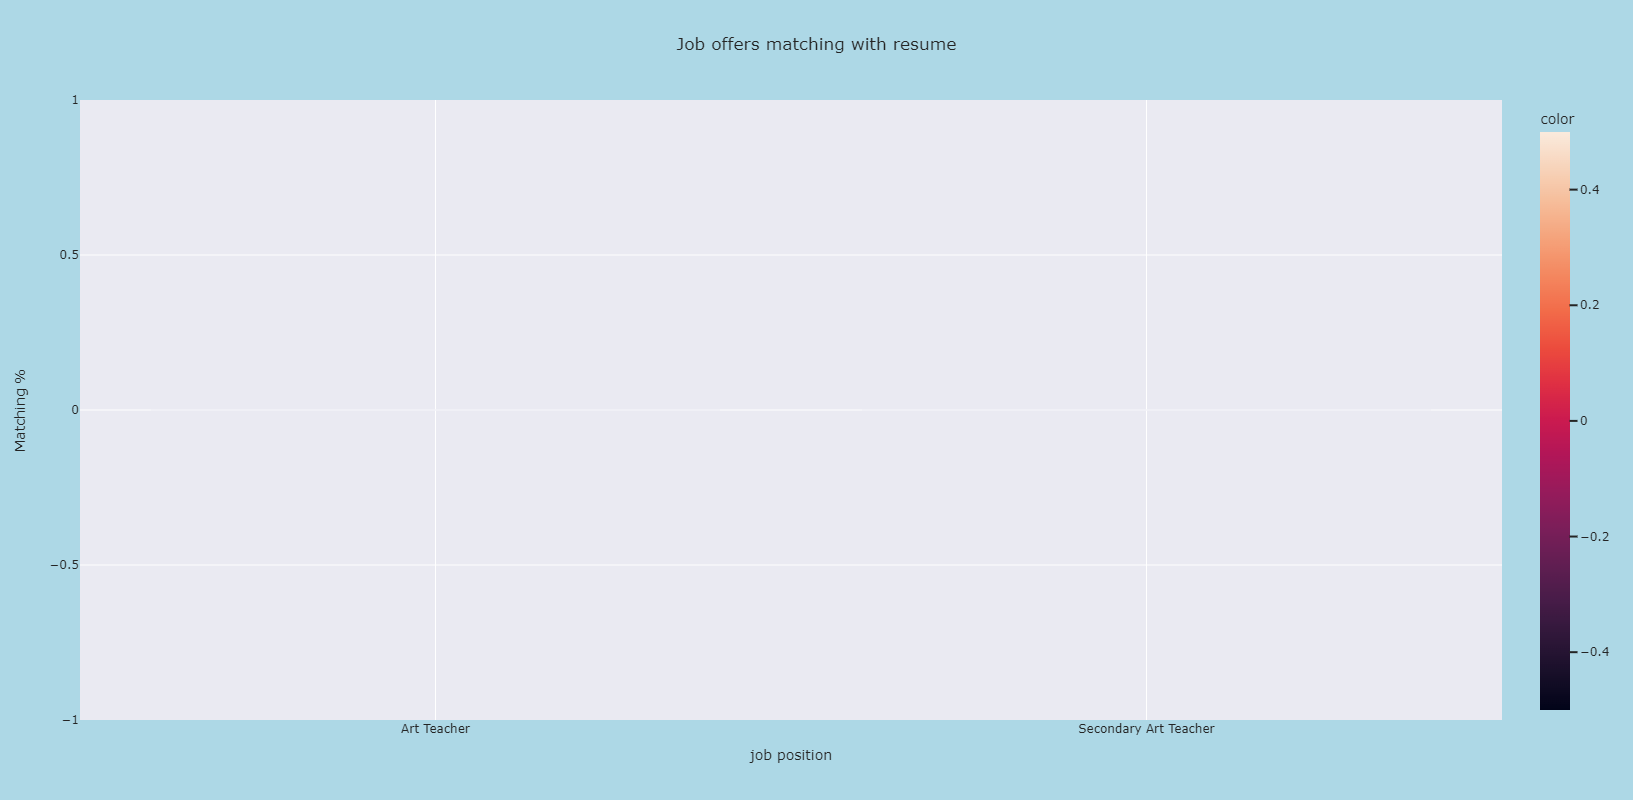

In [527]:
visualizer(pct_list, data)

In [ ]:
def get_cvs():
            #loading the cvs
            #loading the entities
            data_csv_entities = r'skills_matcher/data/data_final_raw_new.csv'
            data_ = pd.read_csv(data_csv_entities)
            data_entities = data_.apply(get_dict, axis=1)
            data_entities
            data_csv_resume = r'cleaned_Resume.csv'
            data_resume = pd.read_csv(data_csv_resume)
            data_cleaned_cv = data_resume.apply(get_dict_cv, axis=1)
            return data_cleaned_cv

In [542]:
inp = 'Mathematical Physicist'
JD = extract_jd_position(inp)
JD

,index,job,position,location,description,entities_auto_label,entities_manual_label,SKILL,KNOWLEDGE,MIN_EXP,LEVEL
0,13,physicist,Mathematical Physicist,"Aldermaston, Berkshire",[' Market leading contributory pension scheme ...,"['C++', 'Python', 'Unix', 'Linux']","[{'entity': Degree, 'label': 'LEVEL'}, {'entit...","[Fortran, C++, Python, C, Unix, Linux]","[Physics, Unix/Linux]",[],[Degree]


In [534]:
df_CV = extract_CV()

In [540]:
JD

0    [Fortran, C++, Python, C, Unix, Linux]
Name: SKILL, dtype: object

In [530]:
for df in range(0, len(JD)):
    list_match = match_skills(JD[i]["SKILL"], df_CV)

,job,position,location,description,entities_auto_label,entities_manual_label,SKILL,KNOWLEDGE,MIN_EXP,LEVEL
52,physicist,Mathematical Physicist,"Aldermaston, Berkshire",[' Market leading contributory pension scheme ...,"(C++, Python, Unix, Linux)","[{'entity': Degree, 'label': 'LEVEL'}, {'entit...","[Fortran, C++, Python, C, Unix, Linux]","[Physics, Unix/Linux]",[],[Degree]
53,physicist,Mathematical Physicist,"Aldermaston, Berkshire",[' Market leading contributory pension scheme ...,"(C++, Python, Unix, Linux)","[{'entity': 5 years, 'label': 'MIN_EXP'}, {'en...","[C, Python, Unix, Linux]",[],[English],[]
54,physicist,Mathematical Physicist,"Aldermaston, Berkshire",[' Market leading contributory pension scheme ...,"(C++, Python, Unix, Linux)",[],"[C, Python, Unix, Linux]",[],[],[]


In [518]:
JD["SKILL"]

0    [Fortran, C++, Python, C, Unix, Linux]
Name: SKILL, dtype: object

# Resume data

In [ ]:
os.chdir('/home/lewagonlew/code/marcorodrigues/skills_matcher')

In [ ]:
os.getcwd()

In [356]:
df_cleaned_Resume.to_csv("cleaned_Resume_final.csv")

In [437]:
df_cleaned_Resume['Resume_str'][0]

"         HR ADMINISTRATOR/MARKETING ASSOCIATE\n\nHR ADMINISTRATOR       Summary     Dedicated Customer Service Manager with 15+ years of experience in Hospitality and Customer Service Management.   Respected builder and leader of customer-focused teams; strives to instill a shared, enthusiastic commitment to customer service.         Highlights         Focused on customer satisfaction  Team management  Marketing savvy  Conflict resolution techniques     Training and development  Skilled multi-tasker  Client relations specialist           Accomplishments      Missouri DOT Supervisor Training Certification  Certified by IHG in Customer Loyalty and Marketing by Segment   Hilton Worldwide General Manager Training Certification  Accomplished Trainer for cross server hospitality systems such as    Hilton OnQ  ,   Micros    Opera PMS   , Fidelio    OPERA    Reservation System (ORS) ,   Holidex    Completed courses and seminars in customer service, sales strategies, inventory control, loss pr

In [478]:
data_CV = df_cleaned_Resume.apply(get_dict_cv, axis=1)

In [438]:
skill_list = extract_resume_skills(df_cleaned_Resume['Resume_str'][0])

In [443]:
df_cleaned_Resume['Resume_str'][0]

"         HR ADMINISTRATOR/MARKETING ASSOCIATE\n\nHR ADMINISTRATOR       Summary     Dedicated Customer Service Manager with 15+ years of experience in Hospitality and Customer Service Management.   Respected builder and leader of customer-focused teams; strives to instill a shared, enthusiastic commitment to customer service.         Highlights         Focused on customer satisfaction  Team management  Marketing savvy  Conflict resolution techniques     Training and development  Skilled multi-tasker  Client relations specialist           Accomplishments      Missouri DOT Supervisor Training Certification  Certified by IHG in Customer Loyalty and Marketing by Segment   Hilton Worldwide General Manager Training Certification  Accomplished Trainer for cross server hospitality systems such as    Hilton OnQ  ,   Micros    Opera PMS   , Fidelio    OPERA    Reservation System (ORS) ,   Holidex    Completed courses and seminars in customer service, sales strategies, inventory control, loss pr

In [ ]:
data_cleaned = df_JD.apply(get_dict, axis=1)

In [ ]:
data_CV = df_Resume.apply(get_dict_cv, axis=1)

In [417]:
data_cleaned.job.unique()

array(['physicist', 'biochemist', 'chemist', 'organic chemist',
       'process chemist', 'geologist', 'hydrogeologist',
       'biostatistician', 'mathematician', 'statistician', 'biologist',
       'geneticist', 'immunologist', 'microbiologist',
       'molecular biologist', 'physiologist', 'toxicologist', 'ecologist',
       'verification engineer', 'construction planner',
       'development engineer', 'inspection engineer', 'plant engineer',
       'process engineer', 'product developer', 'project engineer',
       'environmental engineer', 'instrument engineer',
       'maintenance engineer', 'mechanical designer',
       'mechanical engineer', 'mechatronics engineer', 'testing engineer',
       'audit assistant', 'bookkeeper', 'inspector',
       'field sales representative', 'buyer', 'conference manager',
       'manager', 'administrative assistant', 'geography teacher',
       'primary school teacher', 'supply teacher',
       'special needs teacher', 'speech therapist', 'lang

### Workflow of functions for comparing CV to JD
- load CV text
- call extract_resume_skills(text) and save as cv_skill_set
- call extract_jd with/or without input from frontend and save as data
- call match_skills(cv_skill_list, data)



In [440]:
skill_list = extract_resume_skills(df_cleaned_Resume['Resume_str'][0])

In [441]:
data = extract_jd()

In [366]:
inp = 'mathematician'

Job #2261 in Sector Chief Accountant has a 33.33% match
Job #2384 in Sector Менеджер по маркетингу / Marketing Manager (Inbound Marketing) has a 33.33% match
Job #1378 in Sector senior it auditor has a 12.5% match
Job #2096 in Sector Senior Data Engineer for Ciklum Digital has a 4.55% match
Job #0 in Sector Accelerator Physicist id54315 has a 0.0% match
Job #1 in Sector Applied Physicist (Computing) (EP-LBC-2021-125-LD) id54308 has a 0.0% match
Job #4 in Sector Optics / photonics engineer or physicist (21364) has a 0.0% match
Job #6 in Sector Physicist/Optical Scientist/Engineer Technology Development has a 0.0% match
Job #9 in Sector OSS PHYSICIST has a 0.0% match


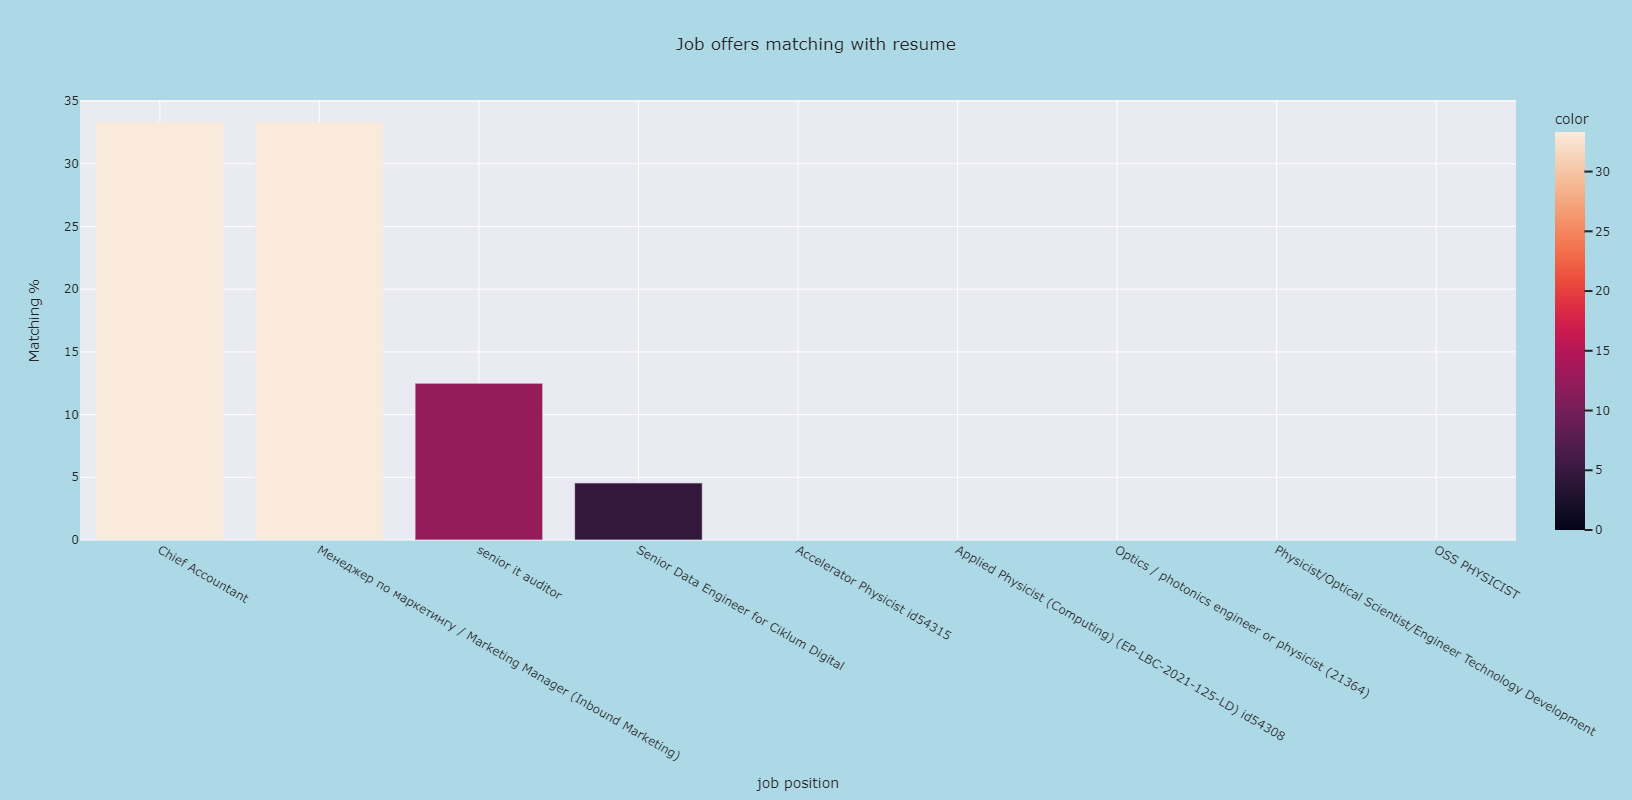

In [442]:
pct_list = match_skills(JD_set, skill_list, data)
pct_list

In [455]:
pct_list = []
    
#JD_set = list(filter(None, JD_set))

for i in range(0, len(JD_set)):
    if len(JD_set[i]) == 0:
        continue
    else:
        #match = set(cv_set) & JD_set[i] 
        #print(match)
        qu = len(set(cv_set) & JD_set[i])
        di = len(JD_set[i])
        pct_match = round((qu/di) * 100, 2)
        pct_list.append([i, pct_match])
            
#pct_list.sort(key=lambda x: x[1], reverse = True)
new_pct = sorted(pct_list, key=lambda x: x[1], reverse = True)
#pct_list = pct_list[0:10]
new_pct = [x for x in new_pct if int(x[0]) > 0] or None
new_pct

[[116, 50.0],
 [540, 50.0],
 [541, 50.0],
 [1045, 50.0],
 [1046, 50.0],
 [1048, 50.0],
 [1049, 50.0],
 [1054, 50.0],
 [1058, 50.0],
 [1059, 50.0],
 [1060, 50.0],
 [1061, 50.0],
 [3309, 50.0],
 [114, 33.33],
 [711, 33.33],
 [1055, 33.33],
 [1064, 33.33],
 [1065, 33.33],
 [1066, 33.33],
 [539, 25.0],
 [1057, 25.0],
 [2669, 25.0],
 [115, 20.0],
 [1044, 20.0],
 [1047, 20.0],
 [1053, 20.0],
 [1056, 20.0],
 [1103, 16.67],
 [2511, 16.67],
 [198, 12.5],
 [2727, 11.76],
 [1401, 11.11],
 [2753, 11.11],
 [832, 10.0],
 [2775, 9.52],
 [2702, 7.14],
 [2704, 6.67],
 [1, 0.0],
 [2, 0.0],
 [3, 0.0],
 [4, 0.0],
 [5, 0.0],
 [6, 0.0],
 [7, 0.0],
 [8, 0.0],
 [9, 0.0],
 [10, 0.0],
 [11, 0.0],
 [13, 0.0],
 [18, 0.0],
 [23, 0.0],
 [24, 0.0],
 [25, 0.0],
 [26, 0.0],
 [27, 0.0],
 [28, 0.0],
 [29, 0.0],
 [30, 0.0],
 [31, 0.0],
 [32, 0.0],
 [33, 0.0],
 [34, 0.0],
 [35, 0.0],
 [36, 0.0],
 [38, 0.0],
 [39, 0.0],
 [40, 0.0],
 [41, 0.0],
 [42, 0.0],
 [43, 0.0],
 [44, 0.0],
 [46, 0.0],
 [47, 0.0],
 [48, 0.0],
 [49, 0.

100 Job as Applied Physicist (trigger development) (EP-CMG-OS-2021-120-LD) in Sector physicist has a 50.0% match
387 Job as Process Chemist in Sector process chemist has a 50.0% match
388 Job as Process Chemist in Sector process chemist has a 50.0% match
802 Job as Mathematician/Natural Scientist (m/f/d) for Management Consulting in Sector mathematician has a 50.0% match
803 Job as Theoretical physicist / Applied Mathematician (80-100%) in Sector mathematician has a 50.0% match
805 Job as Theoretical physicist / Applied Mathematician (80-100%) in Sector mathematician has a 50.0% match
806 Job as Game Mathematician (Quickspin) in Sector mathematician has a 50.0% match
811 Job as Computer scientist, mathematician, physicist or engineer or similar in Sector mathematician has a 50.0% match
815 Job as Computer scientist, mathematician, physicist, engineer or similar (f/m/x) in Sector mathematician has a 50.0% match


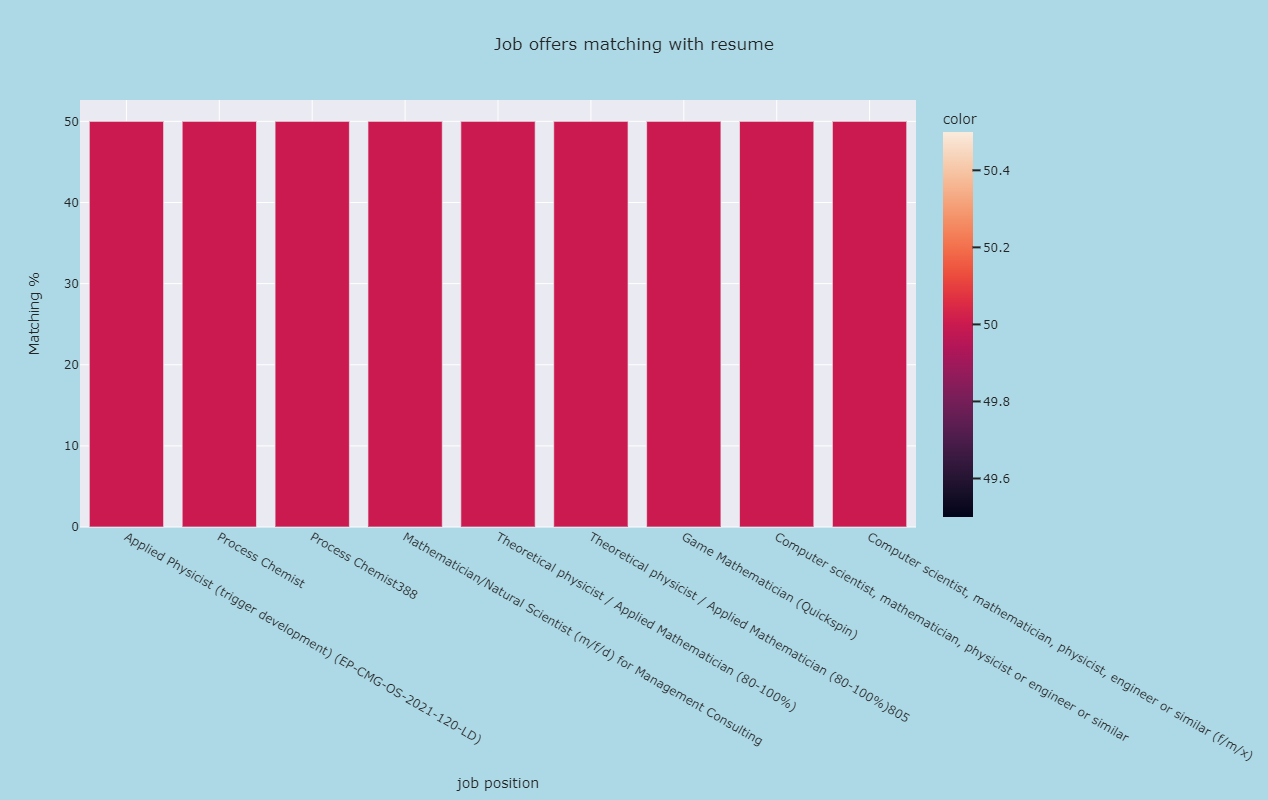

In [413]:
pct_list = match_skills(JD_set, skill_list, data)
pct_list

In [401]:
data.index[0]

0

In [404]:
def match_skills(JD_set, cv_set, data):
    '''Get intersection of resume skills and job offer skills and return match percentage'''
    pct_list = []
    JD_set = data["SKILL"].apply(set)
    
    #JD_set = list(filter(None, JD_set))
    if len(cv_set) < 2:
        print('could not extract skills from resume text')   
    else:
        #implement function comparing with a list of job_descriptions
        for i in range(0, len(JD_set)):
            if len(JD_set) == 0:
                continue
            match = set(cv_set) & JD_set[i] 
            qu = len(match)
            di = len(JD_set[i])
            pct_match = round((qu/di) * 100, 2)
            pct_list.append([i, pct_match])
            
        pct_list.sort(key=lambda x: x[1], reverse = True)
        #new_pct = sorted(pct_list, key=lambda x: x[1], reverse = True)[0:9]
        pct_list = pct_list[0:9]
        
    '''Counting matching score'''
    job_number, matching_score, job_cat = [], [], []
    frame = pd.DataFrame

    for i in pct_list:
        cat = data["position"][i[0]]
        sec = data["job"][i[0]]
        print('{} Job as {} in Sector {} has a {}% match'.format(data.index[i[0]], cat, sec, i[1]))
        #job_number.append(i[0])
        matching_score.append(i[1])

        if cat in job_cat:
            job_cat.append(str(cat) + str(i[0]))
        else:
            job_cat.append(cat)

    frame = pd.DataFrame(job_number, columns=['job_number'])
    frame["matching_score"] = matching_score
    frame["Category"] = job_cat

    
    #Visualizing with plotly
    #for template in ["ggplot2", "seaborn"]:

    fig = px.bar(
        x=frame['Category'], 
        y=frame["matching_score"],
        labels={"x": "job position", "y": "Matching %"},
        title=f"Job offers matching with resume",
        width=1200, height=800,
        template="seaborn",
        color = frame["matching_score"])
    fig.update_layout(
            #margin=dict(l=20, r=20, t=20, b=20),
        paper_bgcolor="lightblue",
    )
    
    return fig.show()

In [ ]:
#create skill_set from entity_ruler
def create_skill_list(text, model = False):
    
    if model == True:
        
        skill_pattern_path = PATH_COMPLETE_DICT
        nlp_ms = spacy.blank("en")
        ruler = nlp_ms.add_pipe("entity_ruler")
        ruler.from_disk(skill_pattern_path)
        doc = nlp_ms(text)
    else:
        doc = text
    
    t = list([ent.text.lower()] for ent in doc.ents )
    flat_list = [item for sublist in t for item in sublist]
    return set(flat_list)

In [ ]:
def extract_resume_skills(text):
    
    #model set to False if nlp models (base, trained) were already applied. Set to true if not
    set_list_2 = []
    ext = []
    
    list_1 = create_skill_list(text, model = True)  #get extracted skills with base_model
    list_2 = load_results_manual(text)     #get extracted skills with trained_model  
        
    for i in range(0, len(list_2)):
        set_list_2.append(str(list_2[i]["entity"]).lower().strip())
    set_list_2 = set(set_list_2)
    ext.append(set.union(list_1, set_list_2))
    
    flat_list = [item for sublist in ext for item in sublist]
    set(flat_list)
        
    return flat_list

# Unused code

In [ ]:
df = df.reindex(np.random.permutation(df.index))
df = df.copy().iloc[
    0:400,
]
df.head()

In [ ]:
job_number, matching_score, job_cat = [], [], []

for i in pct_list:
    cat = df["Category"][i[0]]
    print('Job #{} in Sector {} has a {}% match'.format(i[0], df["Category"][i[0]], i[1]))
    job_number.append(i[0])
    matching_score.append(i[1])
    
    if cat in job_cat:
        job_cat.append(str(cat) + str(i[0]))
    
frame = pd.DataFrame(job_number, columns=['job_number'])
frame["matching_score"] = matching_score
frame["Category"] = df["Category"][i[0]]

In [ ]:
    ## compare list with data_set, visualize highest matching jobs
def 
    job_number, matching_score, job_cat = [], [], []
    frame = pd.DataFrame

    for i in pct_list:
        cat = data_cleaned_small["position"][i[0]]
        print('Job #{} in Sector {} has a {}% match'.format(i[0], cat, i[1]))
        job_number.append(i[0])
        matching_score.append(i[1])

        if cat in job_cat:
            job_cat.append(str(cat) + str(i[0]))
        else:
            job_cat.append(cat)

    frame = pd.DataFrame(job_number, columns=['job_number'])
    frame["matching_score"] = matching_score
    frame["Category"] = job_cat


    #for template in ["ggplot2", "seaborn"]:
    import plotly.graph_objects as go

    fig = px.bar(
        x=frame['Category'], 
        y=frame["matching_score"],
        labels={"x": "job position", "y": "Matching %"},
        title=f"Job offers matching with resume",
        width=1200, height=800,
        template="seaborn",
        color = frame["matching_score"])
    fig.update_layout(
            #margin=dict(l=20, r=20, t=20, b=20),
        paper_bgcolor="lightblue",
    )
    fig.show()

In [ ]:
#functions for getting entities text, label, start and end of character position
"""def create_skill_set(text, model = False):
    '''Apply basic spacy model and Create a set of the extracted skill entities'''
    
    if model == True:
        nlp_ms = spacy.blank("en")
        skill_pattern_path = PATH + "/data/dictionaries/complete_dict.jsonl"
        ruler = nlp_ms.add_pipe("entity_ruler")
        ruler.from_disk(skill_pattern_path)
        doc = nlp(text)
    else:
        doc = text
        
    return set([ent.label_.upper()[6:] for ent in doc.ents if 'skill' or 'knowledge' in ent.label_.lower()])
"""

In [ ]:
fig = px.histogram(
    df, x="Category", title="Distribution of Jobs Categories"
).update_xaxes(categoryorder="total descending")
fig.show()

In [ ]:
%%time
#applying trained models on resume dataset
df_Resume['entities_auto_label'] = df_Resume.Clean_Resume.apply(load_results_auto)
df_Resume['entities_manual_label'] = df_Resume.Clean_Resume.apply(load_results_manual)
df_Resume["marked_text"] = df_Resume["Clean_Resume"].str.lower().apply(nlp_ms)
df_Resume["entity_ruler"] = df_Resume["marked_text"].apply(create_skill_list)
df_Resume.reset_index(inplace = True)
df_Resume